In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("data/FuelConsumption.csv")
fuel_consumption_data = df[['ENGINESIZE','CO2EMISSIONS']]

fuel_consumption_data = fuel_consumption_data[:9]

#fuel_consumption_data.head(20)

X = fuel_consumption_data['ENGINESIZE']
Y = fuel_consumption_data['CO2EMISSIONS']


In [5]:
def lin_regr_func(x,y):
    
    n = len(x)
    
    # denominator
    d = ( n * (x**2).sum() - x.sum()**2 )
    
    # intercept
    a = ( y.sum()*(x**2).sum() - x.sum()*(x*y).sum()) / d
    
    # slope
    b = ( n*(x*y).sum()-x.sum()*y.sum())/d
    
    y_pred = x*b+a
    
    yyi = (y-y_pred)**2
    
    xxi = (x.mean()-x)**2
    
    #standard error
    sb = np.sqrt( yyi.sum()/(n-2)) / np.sqrt(xxi.sum())
    
    # correlation coefficient
    corr_coeff = (n*(x*y).sum() - x.sum()*y.sum())/(np.sqrt(n*(x**2).sum()-x.sum()**2)*np.sqrt((n*(y**2).sum()-y.sum()**2)))
    
    return a,b,corr_coeff,sb

In [6]:

# My own linear calc

#hθ(x) = y_intercept + slope*X

number_observations = len(X)
x_mean = X.sum()/number_observations
y_mean = Y.sum()/number_observations

slope_denominator = 0
slope_numerator = 0
corr_coeff_fred = 0
sb_fred = 0

for i in range(number_observations):
    slope_numerator += ((X[i] - x_mean) * (Y[i] - y_mean)) 

for i in range(number_observations):    
    slope_denominator += ((X[i] - x_mean)**2)

#regression: to obtain slope and intercept
slope = slope_numerator / slope_denominator
y_intercept = y_mean - slope*x_mean

#predictions (all values predicted for Y) from the slope and intercept obtained above
y_predict = y_intercept + slope*X 

# Get the Sum of Squared Errors (SSE)
# The concept is to draw a line through all the plotted data points. 
# The line is positioned in a way that it minimizes the distance to all of the data points.

# thew squared difference between the observed value of y and the predicted value of y at each value of x (y_predict).
# the distance (called "residuals" or "errors") of the points from our regression line and Y
y_squared_errors = (Y - y_predict)**2

y_Sum_Squared_Errors_SSE = y_squared_errors.sum()

#variance of the error terms 
x_variance = (x_mean - X)**2

# standard error of the estimator β (Slope)
# Standard error of the estimated slope
sb_fred = np.sqrt(y_Sum_Squared_Errors_SSE / (number_observations-2) ) / np.sqrt(x_variance.sum())

# correlation coefficient (Pearson) (the confidence interval for the intercept coefficient α (y_intercept))

# Pearson's r, the Pearson product-moment correlation coefficient (PPMCC), or the bivariate correlation, is a 
# measure of linear correlation between two sets of data. It is the covariance of two variables, 
# divided by the product of their standard deviations; 
# thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1. 
# As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationship or correlation

XY_covariance = ( number_observations*(X*Y).sum() - X.sum()*Y.sum() )
XY_product_standard_deviation = ( np.sqrt( number_observations * (X**2).sum() - X.sum()**2 ) * np.sqrt((number_observations * (Y**2).sum() - Y.sum()**2)))

# Pearson's r
corr_coeff_fred = XY_covariance / XY_product_standard_deviation

print('\nslope: {}'.format(slope))
print('\ny_intercept: {}'.format(y_intercept))
#print('\ny_predict: {}'.format(y_predict))

#print('\ny_Sum_Squared_Errors_SSE: {}'.format(y_Sum_Squared_Errors_SSE))

print('\ncorr_coeff: {}'.format(corr_coeff_fred))

print('\nsb: {}'.format(sb_fred))

print('\nR-squared: {}'.format(corr_coeff_fred**2))

# R-squared simplified version:

# SSE already calculated from above
# Sum of Squared Error of predictions = y_Sum_Squared_Errors_SSE

# Calculating Y total Variance
#y_variance = np.sum( (Y - y_mean )**2)

# calculating R-squared
#r2 = 1 - y_Sum_Squared_Errors_SSE / y_variance
#r2 = 0.8457874165566486



slope: 43.98446833930704

y_intercept: 92.80266825965754

corr_coeff: 0.9196670139548593

sb: 7.098713087586441

R-squared: 0.8457874165566474


In [7]:

# We had already calculated SSE from above
print('Sum of Squared Error of predictions: {}'.format(round(y_Sum_Squared_Errors_SSE,2)))

# Calculating total Variance, (y - y_bar)^2
y_variance = np.sum( (Y - y_mean )**2)

print('Total variance in y: {}'.format(round(y_variance,2)))

# Now calculating R^2
r2 = 1 - y_Sum_Squared_Errors_SSE/y_variance
print('R^2: {}'.format(r2))


Sum of Squared Error of predictions: 1968.3
Total variance in y: 12763.56
R^2: 0.8457874165566486


In [8]:
y_intercept_result, slope_result,corr_coeff_result,sb_result = lin_regr_func(X,Y)

print('\nslope: {}'.format(slope_result))
print('\ny_intercept: {}'.format(y_intercept_result))
print('\ncorr_coeff: {}'.format(corr_coeff_result))
print('\nsb: {}'.format(sb_result))
    


slope: 43.98446833930711

y_intercept: 92.80266825965765

corr_coeff: 0.9196670139548593

sb: 7.09871308758644


In [8]:
fuel_consumption_data

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267


In [9]:
prediction_result_ENGINESIZE_2_0 = y_intercept + slope*2.0
prediction_result_ENGINESIZE_2_0

180.77160493827162


scipy import stats results

- slope (float): Slope of the regression line.
    
- intercept (float): Intercept of the regression line.
    
- rvalue (float): Correlation coefficient.
    
- pvalue (float): Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero, 
    using Wald Test with t-distribution of the test statistic.
    
- stderr (float): Standard error of the estimated **slope** (gradient), under the assumption of residual normality.
    
- intercept_stderr (float): Standard error of the estimated **intercept**, under the assumption of residual normality.


In [10]:
# import matplotlib.pyplot as plt
from scipy import stats

result = stats.linregress(X, Y)

print('\nslope: {}'.format(result.slope)) # slope: 43.98446833930711 fred
print('\ny_intercept: {}'.format(result.intercept)) # y_intercept: 92.80266825965765 fred
print('\ncorr_coeff: {}'.format(result.rvalue)) # corr_coeff: 0.9196670139548593 fred
print('\nsb: {}'.format(result.stderr)) # sb: 7.09871308758644 fred

print(f"R-squared: {result.rvalue**2:.6f}") # corr_coeff**2 0.8457874165566474 fred

print('\np-value: {}'.format(result.pvalue)) # 



slope: 43.98446833930704

y_intercept: 92.80266825965754

corr_coeff: 0.91966701395486

sb: 7.098713087586441
R-squared: 0.845787

p-value: 0.0004469403762096899


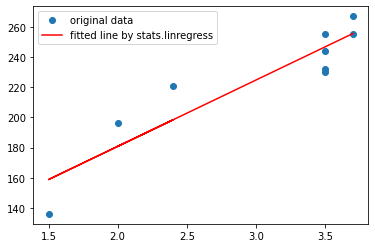

In [11]:
plt.plot(X, Y, 'o', label='original data')
plt.plot(X, result.intercept + result.slope*X, 'r', label='fitted line by stats.linregress')
plt.legend()
plt.show()

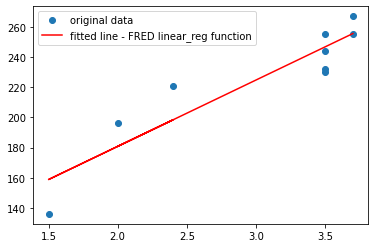

In [12]:
plt.plot(X, Y, 'o', label='original data')
plt.plot(X, y_intercept + slope*X, 'r', label='fitted line - FRED linear_reg function')
plt.legend()
plt.show()


slope: 43.98446833930704

y_intercept: 92.80266825965754

corr_coeff: 0.91966701395486

sb: 7.098713087586441
R-squared: 0.845787

p-value: 0.0004469403762096899


In [13]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_constant = sm.add_constant(X)
mod = sm.OLS(Y, X_constant)
statsmodels_results = mod.fit()
statsmodels_results.summary()

# prediction_result_ENGINESIZE_2_0 =             y_intercept (CO2EMISSIONS) + slope*2.0
# prediction_result_ENGINESIZE_2_0_statsmodels = const (CO2EMISSIONS)       + slope*2.0
#                                                92.80                      + 43.98

# Standard error of the estimated slope(std err) = 7.099


/home/fredsena/anaconda3/envs/jupyterlab-debugger/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     38.39
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           0.000447
Time:                        05:24:28   Log-Likelihood:                -37.015
No. Observations:                   9   AIC:                             78.03
Df Residuals:                       7   BIC:                             78.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.8027     22.246      4.172      0.004      40.198     145.407
ENGINESIZE    43.9845      7.099      6.196      0.000      27.199      60.770
==============================================================================
Omnibus:                        1.129   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.569   Jarque-Bera (JB):                0.642
Skew:                          -0.088   Prob(JB):                        0.726
Kurtosis:                       1.704   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

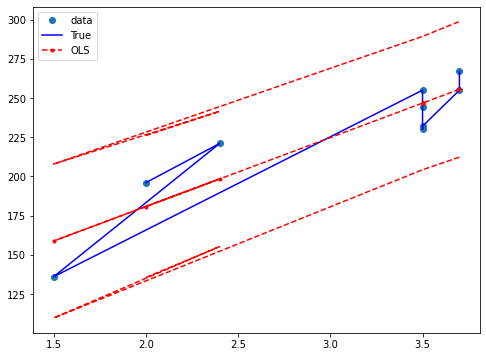

In [14]:
prstd, iv_l, iv_u = wls_prediction_std(statsmodels_results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, Y, 'o', label="data")
ax.plot(X, Y, 'b-', label="True")
ax.plot(X, statsmodels_results.fittedvalues, 'r--.', label="OLS")
ax.plot(X, iv_u, 'r--')
ax.plot(X, iv_l, 'r--')
ax.legend(loc='best');


In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Using the same data for training/testing sets

# Reshape your data either using: 
# array.reshape(-1, 1) if your data has a single feature or 
# array.reshape(1, -1) if it contains a single sample

train_x = X.values.reshape(-1, 1)
train_y = Y.values.reshape(-1, 1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_x, train_y)

# Make predictions using the train set
sklearn_y_pred = regr.predict(train_x)

# The coefficients
#print('Coefficients: \n', regr.coef_)
print('\nslope: ', regr.coef_)

print('\ny_intercept: ', regr.intercept_)

# Coefficient of determination
print('\nR-squared:: ', r2_score(Y, sklearn_y_pred))



slope:  [[43.98446834]]

y_intercept:  [92.80266826]

R-squared::  0.8457874165566486


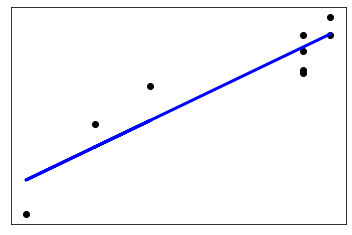

In [16]:
# Plot outputs
#plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.scatter(X, Y,  color='black')

#plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.plot(X, sklearn_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [17]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# TRAIN/ TEST FULL DATA

df = pd.read_csv("data/FuelConsumption.csv")
fuel_consumption_data_All = df[['ENGINESIZE','CO2EMISSIONS']]
train_set, test_set = train_test_split(fuel_consumption_data_All, test_size=0.2, random_state=42)

#train_set.describe()
#test_set.describe()

# Split the data into training/testing sets
train_x = np.asanyarray(train_set[['ENGINESIZE']])
train_y = np.asanyarray(train_set[['CO2EMISSIONS']])

test_x = np.asanyarray(test_set[['ENGINESIZE']])
test_y = np.asanyarray(test_set[['CO2EMISSIONS']])

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_x, train_y)

# Make predictions using the testing set
sklearn_y_pred = regr.predict(test_x)

# The coefficients
#print('Coefficients: \n', regr.coef_)
print('\nslope: ', regr.coef_)

print('\ny_intercept: ', regr.intercept_)

# The mean squared error
print('\nMean squared error: %.2f' % mean_squared_error(test_y, sklearn_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('\nR-Squared: %.2f' % r2_score(test_y, sklearn_y_pred))



slope:  [[38.99297872]]

y_intercept:  [126.28970217]

Mean squared error: 985.94

R-Squared: 0.76


In [18]:
 126.29 + 38.99*2.4

219.866

In [262]:
#fuel_consumption_data_All[(fuel_consumption_data_All['ENGINESIZE']==2.4)].sort_values(by='CO2EMISSIONS', ascending=True)

In [19]:
# The default returns the Pearson correlation coefficient for each row-column pair.
#.corr(method="spearman") or .corr(method="kendall")).
fuel_consumption_data_All.corr()

,ENGINESIZE,CO2EMISSIONS
ENGINESIZE,1.000000,0.874154
CO2EMISSIONS,0.874154,1.000000


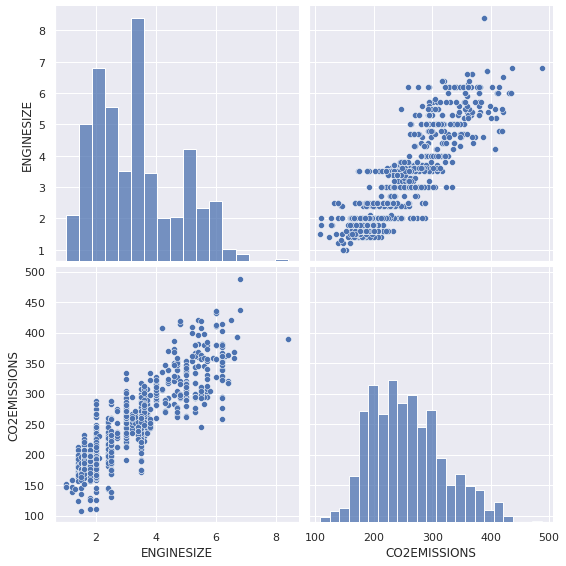

In [20]:
import seaborn as sns
sns.set()
sns.pairplot(fuel_consumption_data_All, height=4)

<AxesSubplot:>

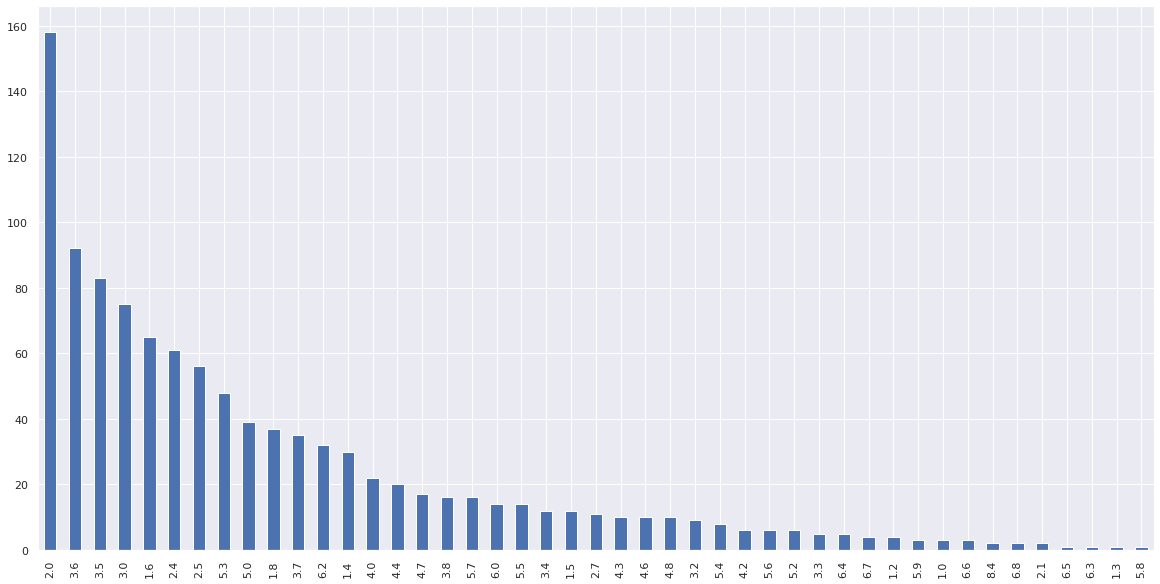

In [21]:
engine = fuel_consumption_data_All['ENGINESIZE'].value_counts()

engine.plot(kind='bar', figsize=(20, 10))

<AxesSubplot:xlabel='ENGINESIZE', ylabel='count'>

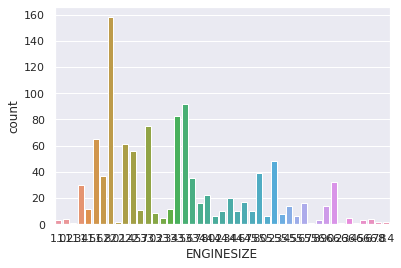

In [22]:
sns.countplot(x=fuel_consumption_data_All['ENGINESIZE'])


/home/fredsena/anaconda3/envs/jupyterlab-debugger/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ENGINESIZE', ylabel='Density'>

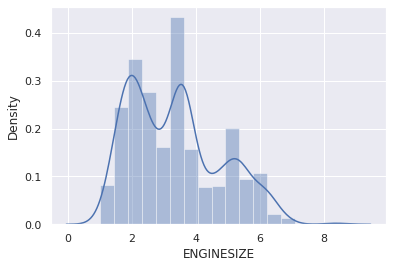

In [23]:
sns.distplot(fuel_consumption_data_All['ENGINESIZE'])

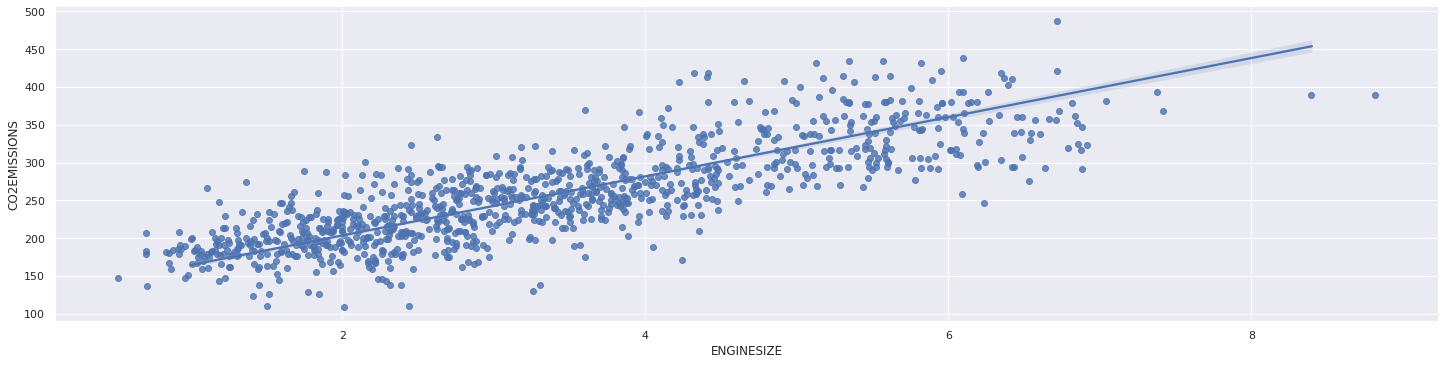

In [24]:
sns.lmplot(x="ENGINESIZE", y="CO2EMISSIONS", data=fuel_consumption_data_All, height=5, aspect=4, x_jitter=.9, y_jitter=.9)


<AxesSubplot:>

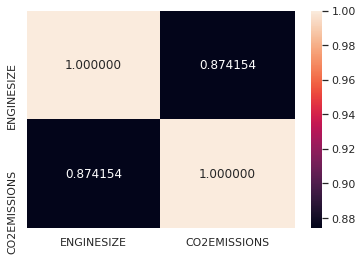

In [27]:

sns.heatmap(fuel_consumption_data_All.corr(), annot=True, fmt="f")
